In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #splitting train into train and test sets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [2]:
def clean_emails(email):
    email = word_tokenize(email)
    email = [word.lower() for word in email if word.lower() not in stopwords.words('english')]
    email = [word for word in email if word.isalnum()]
    email = [word for word in email if not word == 'subject']
    return ' '.join(email)

In [3]:
df1 = pd.read_csv('data/all_emails.csv')

df1['text'] = df1['text'].apply(clean_emails)

In [4]:
# split into train and validate
X_train_words, X_val_words, y_train, y_val = train_test_split(df1['text'], df1['spam'], test_size=.15)

In [5]:
#initialize vectorize object
vectorizer = TfidfVectorizer(ngram_range=[1,4], max_features=5000)

#fit transform to train data
X_train = vectorizer.fit_transform(X_train_words)
X_val = vectorizer.transform(X_val_words)

In [6]:
mod = LogisticRegressionCV(cv=4, max_iter=400).fit(X_train, y_train)

print("train accuracy {:.2f}%".format(mod.score(X_train, y_train) * 100))
print("val accuracy {:.2f}%".format(mod.score(X_val, y_val) * 100))

y_pred_val = mod.predict(X_val)

print(classification_report(y_val, y_pred_val))
print(f'acc: {accuracy_score(y_val, y_pred_val) * 100: .2f}%')

train accuracy 99.97%
val accuracy 99.37%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       486
           1       0.99      0.99      0.99       153

    accuracy                           0.99       639
   macro avg       0.99      0.99      0.99       639
weighted avg       0.99      0.99      0.99       639

acc:  99.37%


In [7]:
df2 = pd.read_csv("data/eval_students_2.csv")

X_test = df2['text'].apply(clean_emails)

In [8]:
X_test = vectorizer.transform(X_test)

print(X_test.shape)

(1468, 5000)


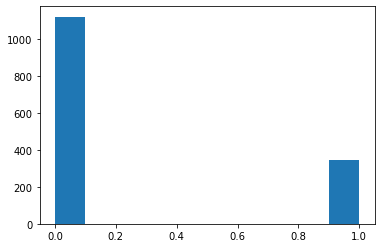

In [9]:
y_pred = mod.predict(X_test)

plt.hist(y_pred)

df_out = pd.DataFrame(df2['id'])
df_out['spam'] = y_pred

df_out.to_csv('.\predictions\DowneyBlake_9.csv')